# Sınıflandırma Modeli Değerlendirme(Classification Model Evaluation)

In [1]:
# Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
# Veri Setinin Oluşturulması
gercek_deger = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
model_olasilik_tahmini = [0.7, 0.8, 0.65, 0.9, 0.45, 0.5, 0.55, 0.35, 0.4, 0.25]


df = pd.DataFrame({
    'Gerçek Değer': gercek_deger,
    'Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)': model_olasilik_tahmini
})

In [3]:
df

,Gerçek Değer,Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)
0,1,0.70
1,1,0.80
2,1,0.65
3,1,0.90
4,1,0.45
5,1,0.50
6,0,0.55
7,0,0.35
8,0,0.40
9,0,0.25


In [4]:
# Classification Threshold değerine göre tahmin değerlerinin ayarlanması
df["Tahmin Edilen Değer"] = [1 if col >= 0.5 else 0 for col in df["Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)"]]
df = df[["Gerçek Değer", "Tahmin Edilen Değer", "Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)"]]
df

,Gerçek Değer,Tahmin Edilen Değer,Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)
0,1,1,0.70
1,1,1,0.80
2,1,1,0.65
3,1,1,0.90
4,1,0,0.45
5,1,1,0.50
6,0,1,0.55
7,0,0,0.35
8,0,0,0.40
9,0,0,0.25


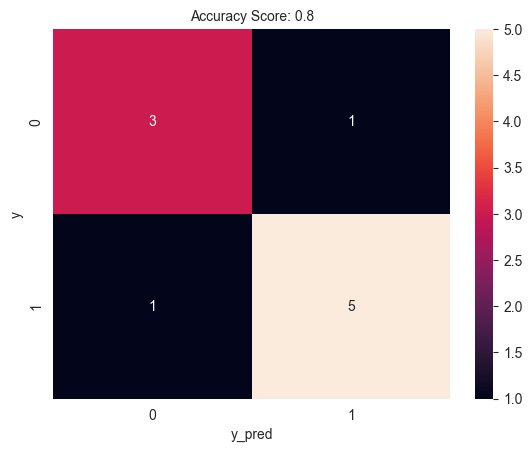

In [5]:
# Confusion Matrisinin Görselleştirilmesi
y = df["Gerçek Değer"]
y_pred = df["Tahmin Edilen Değer"]

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [6]:
# Classification Report
print(classification_report(y, y_pred)) 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10


In [7]:
# Manuel Hesaplama
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[3 1]
 [1 5]]


In [11]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("TP: {}\nTN: {}\nFP: {}\nFN: {}\n".format(TP, TN, FP, FN))

TP: 5
TN: 3
FP: 1
FN: 1


In [12]:
# Accuary: Doğru sınıflandırma oranı => 0.8
acc = (TP + TN) / np.sum(cm)

# Precision: Pozitif sınıf (1) tahminlerinin başarı oranıdır. => 0.83
precision = TP / (TP + FP)

# Recall: Pozitif sınıfın(1) doğru tahmin edilme oranıdır. => 0.83
recall = TP / (TP + FN)

# F1 Score => 0.83
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuary Score: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n".format(acc,precision, recall,f1_score))

Accuary Score: 0.8
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


In [16]:
# Alternatif Çözüm
cm.ravel()

TN_optional, FP_optional, FN_optional, TP_optional = cm.ravel()

print("TN_optional: {}\nFP_optional: {}\nFN_optional: {}\nTP_optional: {}".format(TN_optional, FP_optional, FN_optional, TP_optional))

TN_optional: 3
FP_optional: 1
FN_optional: 1
TP_optional: 5


In [17]:
# Accuary Alternatif => 0.8
accuary_optional = (TP_optional + TN_optional) / (TN_optional + FP_optional + FN_optional + TP_optional)

# Precision Alternatif
precision_optional = TP_optional / (TP_optional + FP_optional)

# Recall Alternatif
recall_optional = TP_optional / (TP_optional + FN_optional)

# F1 Score Alternatif
f1_score_optional = 2 * (precision_optional * recall_optional) / (precision_optional + recall_optional)

print("Accuary: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}\n".format(accuary_optional, precision_optional, recall_optional, f1_score_optional))

Accuary: 0.8
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


# Tüm Sürecin Fonksiyonlaştırılması

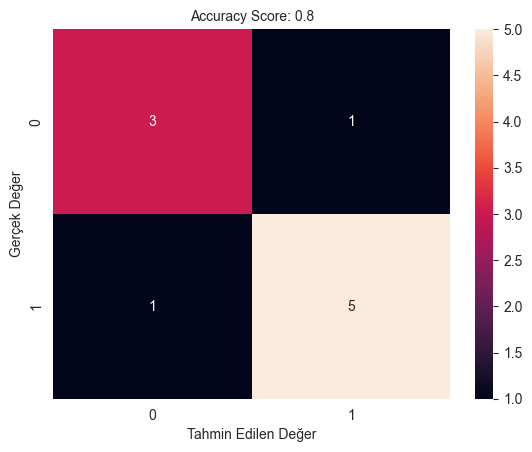

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10

Confusion Matrix:
 [[3 1]
 [1 5]]
##################################################
Manuel Hesaplama:
##################################################
Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
##################################################
Confusion Matrix:
 [[3 1]
 [1 5]]
##################################################
Alternatif Hesaplama:
##################################################
Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


In [18]:
def confusion_matrix_calculate(gercek_deger, model_olasilik_tahmini, threshold=0.5):
    # DataFrame Oluşturma
    df = pd.DataFrame({
        'Gerçek Değer': gercek_deger,
        'Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)': model_olasilik_tahmini
    })

    # Tahmin edilen değerleri eşiğe göre ayarlama
    df["Tahmin Edilen Değer"] = [1 if prob >= threshold else 0 for prob in model_olasilik_tahmini]
    df = df[["Gerçek Değer", "Tahmin Edilen Değer", "Model Olasılık Tahmini (1 sınıfına ait olma olasılığı)"]]


    y = df["Gerçek Değer"]
    y_pred = df["Tahmin Edilen Değer"]

    # Karışıklık matrisinin grafiğini çizme
    def plot_confusion_matrix(y, y_pred):
        acc = round(accuracy_score(y, y_pred), 2)
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt=".0f")
        plt.xlabel('Tahmin Edilen Değer')
        plt.ylabel('Gerçek Değer')
        plt.title('Accuracy Score: {0}'.format(acc), size=10)
        plt.show()

    plot_confusion_matrix(y, y_pred)
    print("Classification Report:\n", classification_report(y, y_pred))

    # Confusion Matrisini Manuel Olarak Hesaplama
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Accuary: Doğru sınıflandırma oranı => 0.8
    acc = (TP + TN) / np.sum(cm)
    # Precision: Pozitif sınıf (1) tahminlerinin başarı oranıdır. => 0.83
    precision = TP / (TP + FP)
    # Recall: Pozitif sınıfın(1) doğru tahmin edilme oranıdır. => 0.83
    recall = TP / (TP + FN)
    # F1 Score => 0.83
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Alternatif Çözüm
    TN_optional, FP_optional, FN_optional, TP_optional = cm.ravel()

    # Accuary Alternatif => 0.8
    accuary_optional = (TP_optional + TN_optional) / (TN_optional + FP_optional + FN_optional + TP_optional)
    # Precision Alternatif
    precision_optional = TP_optional / (TP_optional + FP_optional)
    # Recall Alternatif
    recall_optional = TP_optional / (TP_optional + FN_optional)
    # F1 Score Alternatif
    f1_score_optional = 2 * (precision_optional * recall_optional) / (precision_optional + recall_optional)

    # Manuel Hesaplama Sonucları
    print("Confusion Matrix:\n", cm)
    print("#" * 50)
    print("Manuel Hesaplama:")
    print("#" * 50)
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print("#" * 50)

    # Alternatif Hesaplama Sonucları
    print("Confusion Matrix:\n", cm)
    print("#" * 50)
    print("Alternatif Hesaplama:")
    print("#" * 50)
    print(f"Accuracy: {accuary_optional:.2f}")
    print(f"Precision: {precision_optional:.2f}")
    print(f"Recall: {recall_optional:.2f}")
    print(f"F1 Score: {f1_score_optional:.2f}")


# Örnek Kullanım
gercek_deger = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
model_olasilik_tahmini = [0.7, 0.8, 0.65, 0.9, 0.45, 0.5, 0.55, 0.35, 0.4, 0.25]

confusion_matrix_calculate(gercek_deger, model_olasilik_tahmini, threshold=0.5)
